In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras
#https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-predict-new-samples-with-your-keras-model.md

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:

print('Datos de entrenamiento:',X_train.shape)
print('Datos de test:',X_test.shape)

Datos de entrenamiento: (60000, 28, 28)
Datos de test: (10000, 28, 28)


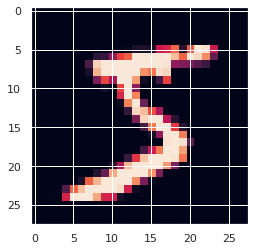

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

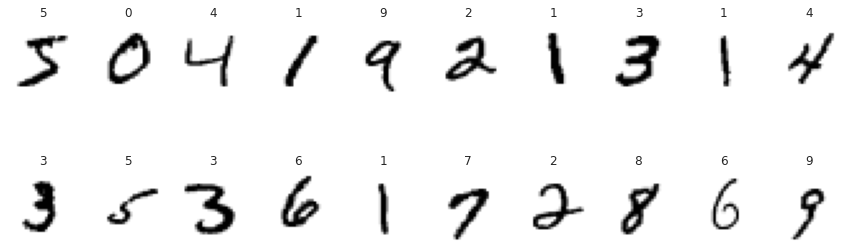

In [ ]:
fig,ax=plt.subplots(2,10,figsize=(15,5))
for i,ax in enumerate(ax.flat):
  ax.imshow(X_train[i],cmap='binary')
  ax.set_axis_off()
  ax.set_title(y_train[i])

In [ ]:
keras.backend.clear_session()


In [ ]:
np.shape(X_train)

(60000, 28, 28)

In [ ]:
28*28

784

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(40,kernel_size=3,strides=1,padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)),
                               keras.layers.MaxPool2D(pool_size=2),
                               keras.layers.Conv2D(80,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.MaxPool2D(pool_size=2),
                               keras.layers.Conv2D(100,kernel_size=3,strides=2,padding='valid',activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.MaxPool2D(pool_size=2),
                               keras.layers.Flatten(),
                               keras.layers.Dense(50,activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.Dense(20,activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.3)


Epoch 1/10
1313/1313 [==============================] - 57s 42ms/step - loss: 0.2265 - accuracy: 0.9290 - val_loss: 0.1040 - val_accuracy: 0.9708
Epoch 2/10
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.0779 - val_accuracy: 0.9766
Epoch 3/10
1313/1313 [==============================] - 53s 41ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0639 - val_accuracy: 0.9807
Epoch 4/10
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0492 - val_accuracy: 0.9863
Epoch 5/10
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0545 - val_accuracy: 0.9854
Epoch 6/10
1313/1313 [==============================] - 53s 41ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0475 - val_accuracy: 0.9863
Epoch 7/10
1313/1313 [==============================] - 53s 41ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0595 -

In [ ]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 5s 14ms/step - loss: 0.0508 - accuracy: 0.9868


[0.05080047622323036, 0.9868000149726868]

In [ ]:
np.shape(X_test[0][0:28,0:28])

(28, 28, 1)

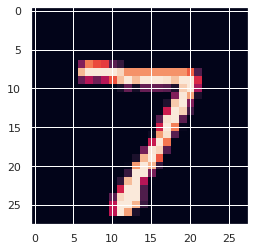

In [ ]:
plt.imshow(X_test[0].reshape(28,28))

In [ ]:
q=model.predict(X_test)


In [ ]:
np.shape(q)

(10000, 10)

In [ ]:
np.max(q[0])

1.0

In [ ]:
q[0]

array([2.1591962e-10, 5.0136526e-09, 1.1014268e-09, 1.4452482e-10,
       1.9606390e-09, 1.4798534e-11, 2.2423623e-14, 1.0000000e+00,
       4.5477026e-14, 4.5708988e-09], dtype=float32)

Ejercicio usando Cifar100


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras
#https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()

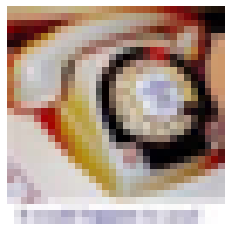

In [ ]:
plt.imshow(train_image[5])
plt.grid(0)
plt.axis('off')
plt.show()

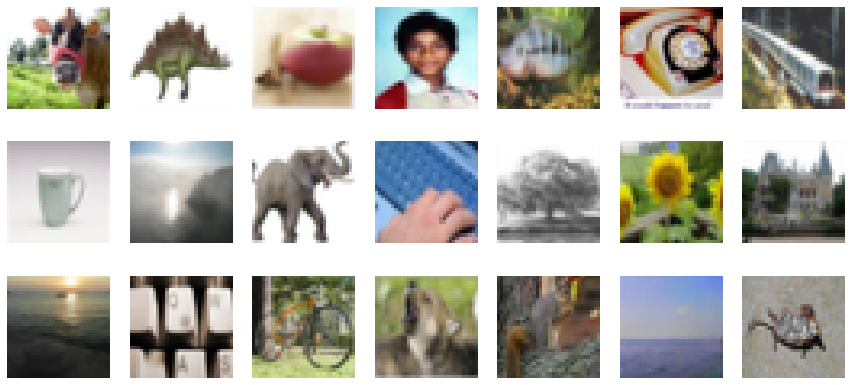

In [ ]:
fig , ax = plt.subplots(3,7, figsize=(15,7))
for i, ax in enumerate(ax.flat):
  ax.imshow(train_image[i], cmap='Greys')
  ax.axis('off')

In [ ]:
train_image = train_image / 255.0
test_image = test_image / 255.0

In [ ]:
keras.backend.clear_session()


In [ ]:
model = keras.models.Sequential([
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.2),

      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.2),

      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal',  padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.2),

      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal'),

      keras.layers.Dropout(0.2),

      keras.layers.Dense(100, activation='softmax')
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


usemos early stopping en nuestro modelo



In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


In [ ]:
history = model.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])


Epoch 1/30
625/625 [==============================] - 334s 530ms/step - loss: 3.8830 - accuracy: 0.1244 - val_loss: 3.3800 - val_accuracy: 0.2004
Epoch 2/30
625/625 [==============================] - 334s 534ms/step - loss: 2.9778 - accuracy: 0.2661 - val_loss: 2.6626 - val_accuracy: 0.3318
Epoch 3/30
625/625 [==============================] - 335s 537ms/step - loss: 2.5773 - accuracy: 0.3447 - val_loss: 2.6284 - val_accuracy: 0.3475
Epoch 4/30
625/625 [==============================] - 334s 535ms/step - loss: 2.3228 - accuracy: 0.3925 - val_loss: 2.2426 - val_accuracy: 0.4154
Epoch 5/30
625/625 [==============================] - ETA: 0s - loss: 2.1228 - accuracy: 0.4341

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_image, test_label, verbose=0)


--2022-10-06 21:54:53--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168370 (164K) [image/jpeg]
Saving to: ‘indian_elephant.jpg’

indian_elephant.jpg 100%[===================>] 164.42K  --.-KB/s    in 0.005s  

2022-10-06 21:54:53 (30.9 MB/s) - ‘indian_elephant.jpg’ saved [168370/168370]

--2022-10-06 21:54:53--  https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ssanchezgoe/diplomado_udea/raw/master/image/african_elephant_bull.jpg [following]
--2022-10-06 21:54:53--  https://

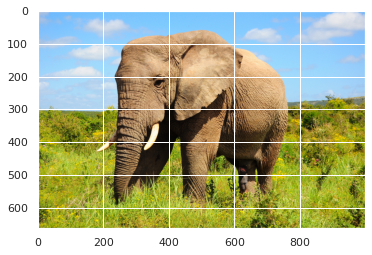

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

# Choose the elephant to be classified
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)

In [ ]:
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Prediction [('n02504458', 'African_elephant', 0.7551289), ('n01871265', 'tusker', 0.2037844), ('n02504013', 'Indian_elephant', 0.041085865)]
